# 마이크로디그리 기초 통계 실습 (R) - PART 2

Example 1

What does the probability mass function (pmf) of the binomial distribution actually look like? The
plot shows the pmf for X ∼ Bin(n = 10, p = 0.5).

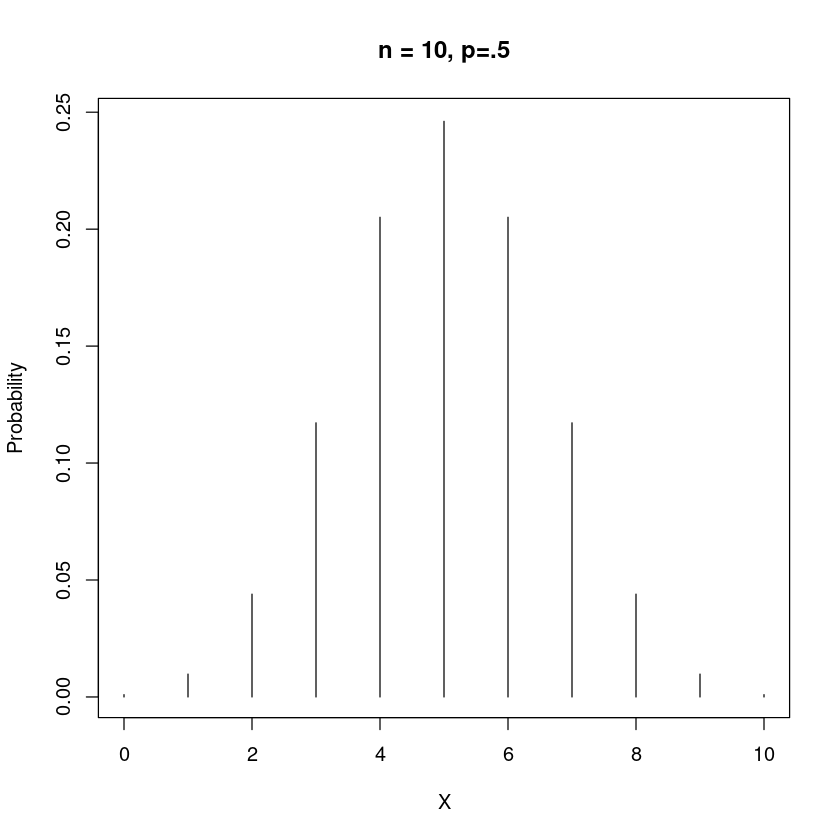

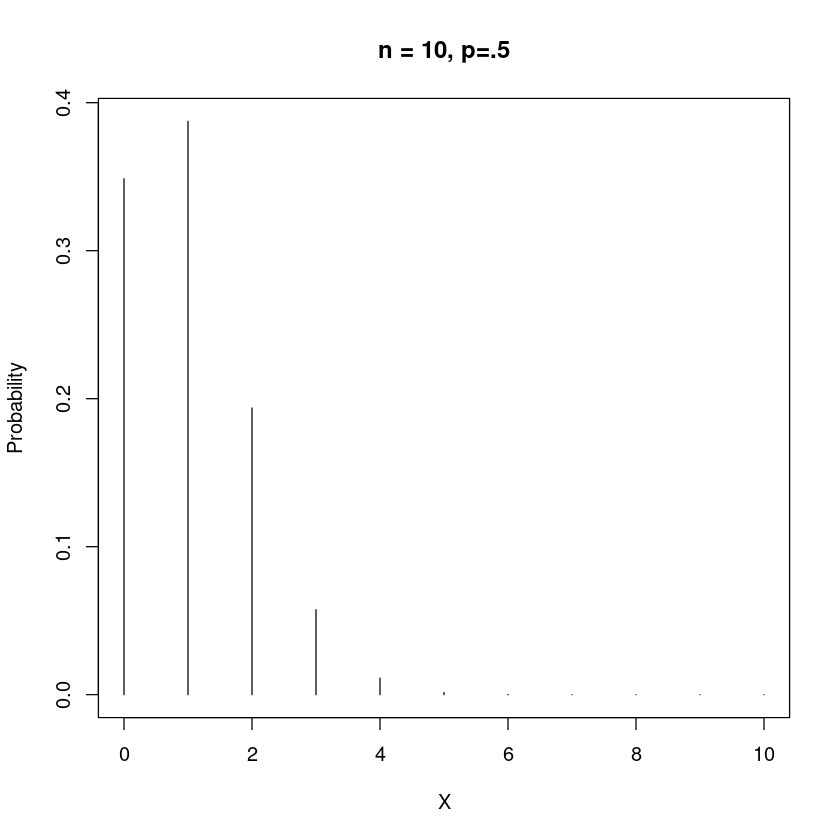

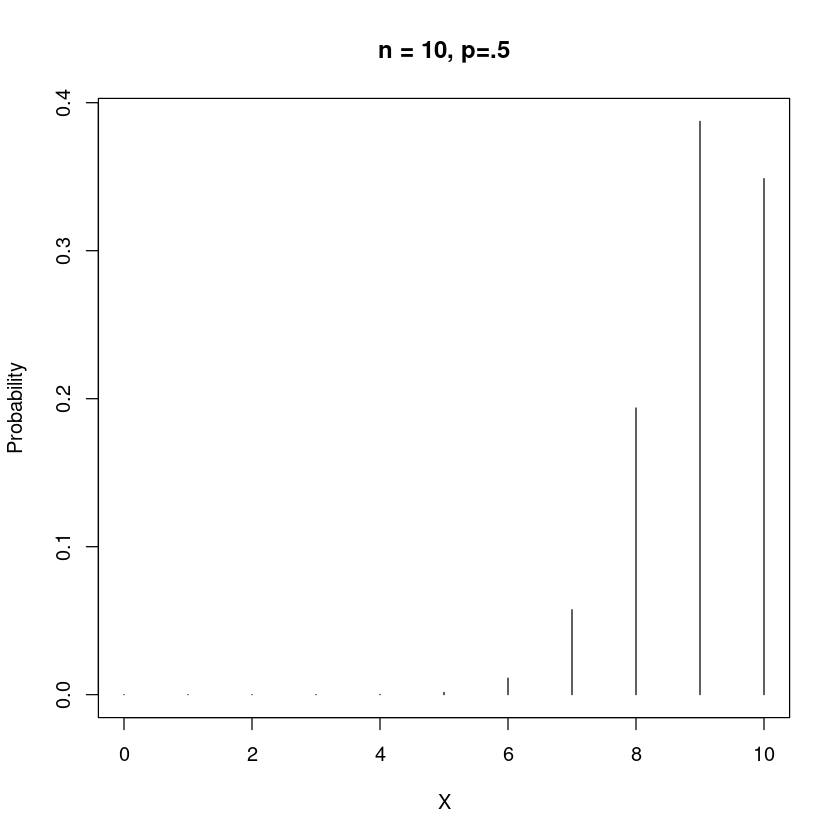

In [14]:
plot(0:10,dbinom(0:10,10,.5), type = "h", ylab = "Probability", xlab = "X", main = "n = 10, p=.5")

# dbinom(0:10, 10, .5) n = 10이고 p = 0.5이다.

plot(0:10,dbinom(0:10,10,.1), type = "h", ylab = "Probability", xlab = "X", main = "n = 10, p=.5")

plot(0:10,dbinom(0:10,10,.9), type = "h", ylab = "Probability", xlab = "X", main = "n = 10, p=.5")

Example 2


Suppose we have a biased coin, with probability of heads p = 0.4, and we flip the coin 10 times.
What is the probability of obtaining exactly 5 heads in 10 tosses?

In [9]:
dbinom(5, 10, .4) # n = 10이고, 성공확율이 0.4일때 5일 확율은 뭐냐?
# X ~ B(10, 0.4)
# use pmf
1-pbinom(5, 10, .4)
# P(X >= 6) = 1 - P(X < 6) = 1- P(X <= 5)
pbinom(5, 10, .4, lower.tail = F)

[1] 0.2006581

[1] 0.1662386

[1] 0.1662386

In [11]:
?dpois # help

# Density, distribution function, quantile function and random generation for the Poisson distribution with parameter lambda.

#dpois(x, lambda, log = FALSE)
#ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)
#qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)
#rpois(n, lambda)

Example 3


What does the probability density function (pdf) of the normal distribution actually look like? The
plot shows the pdfs of three normal R.V.s with µ = 0 but have different variances.

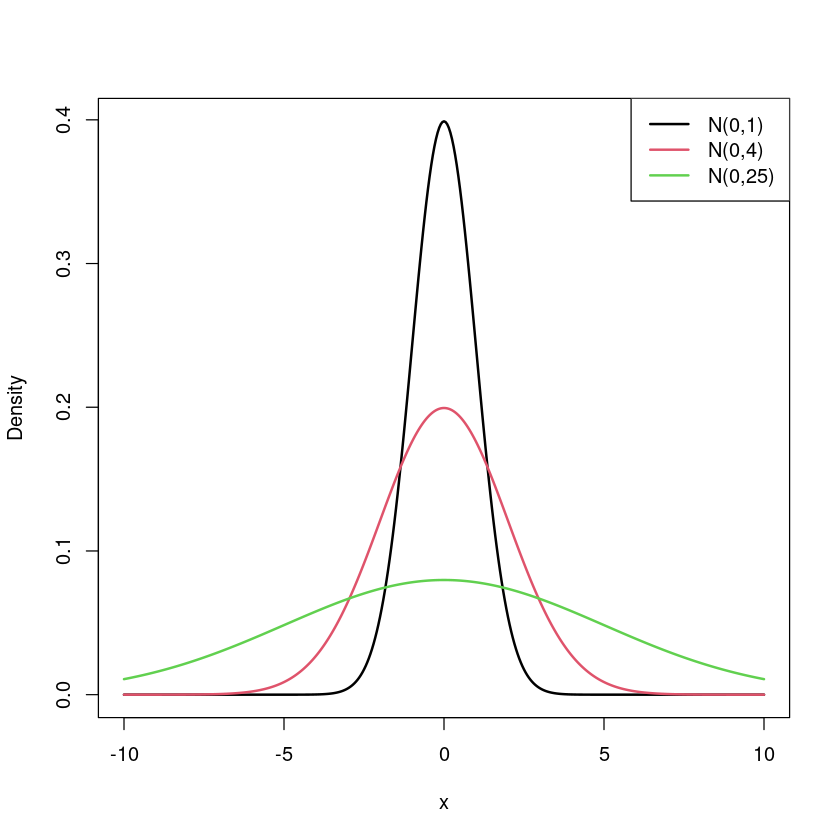

In [12]:
x=seq(from=-10,to=10,by=.05) # creates an object with the values of x i want to plot
#head(x) # uncomment this to see what the vector x contains
plot(x,dnorm(x,mean=0,sd=1),type="l",ylab="Density",lwd=2)
lines(x,dnorm(x,mean=0,sd=2),lty=1,col=2,lwd=2) # lines는 원래의 plot에 겹쳐서 그리는 것이다.
lines(x,dnorm(x,mean=0,sd=5),lty=1,col=3,lwd=2)
legend("topright",c("N(0,1)","N(0,4)","N(0,25)"),lwd=2,lty=1,col=1:3)

Example 4


How can we understand how to interpret the population mean as a long-run average? Suppose I
sequentially generate 10,000 independent observations from a normal distribution with µ = 10 and
σ 2 = 1. Then I plot the average of the observations as a function of time. For example, at time
point 1, the average is just the first observation. At time point 2, the average is the average of the
first 2 observations. At time point 3, the average is the average of the first 3 observations. And so
on.... What value does the average eventually converge to?

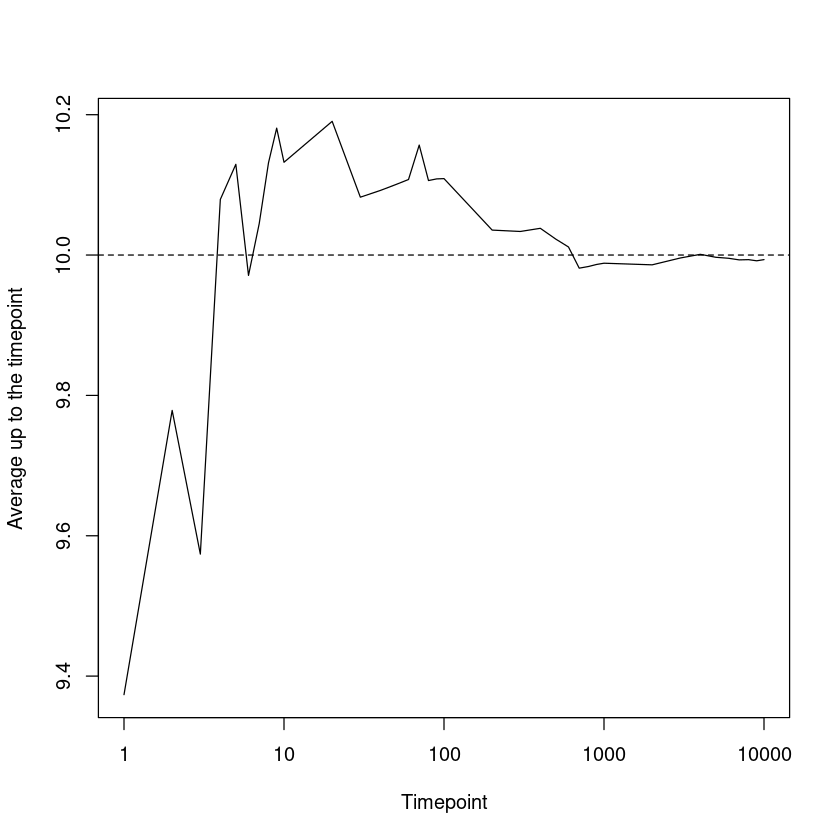

In [28]:
set.seed(1)
x=rnorm(10000,10,1)
# I don't want to calculate the mean 10000 times, so I will look at snapshots of
# the timepoints.
y=c(1:10,seq(20,100,by=10),seq(200,1000,by=100),seq(2000,10000,by=1000))
# 처음엔 1:10 by = 100이되면 200 ~ 1000 이런식으로 업데이트  
result=rep(0,length(y))
for(irep in 1:length(y)){ 
    result[irep]=mean(x[1:y[irep]])
    }
#
# note the log-scale of the x-axis
plot(y,result,type='l',xlab='Timepoint',ylab='Average up to the timepoint',log='x')
abline(h=10,lty=2)

Example 5


What value is the 95th percentile of a standard normal R.V.? Equivalently, what is the value c
such that P (X ≤ c) = 0.95? Recall: standard normal means that X ∼ N ormal(µ = 0, σ 2 = 1).

In [29]:
qnorm(0.95,0,1)

[1] 1.644854

Example 6


What percentile does the value 1.645 correspond to for a standard normal R.V.? Equivalently,
what is P (X ≤ 1.645)?

In [30]:
pnorm(1.645,0,1)

[1] 0.9500151

$P(-1.3 < X < 1.5)$

$X  $~$  N(3, 5^2)$

일때는 어떻게 되냐?

In [32]:
?dexp

#dexp(x, rate = 1, log = FALSE)
#pexp(q, rate = 1, lower.tail = TRUE, log.p = FALSE)
#qexp(p, rate = 1, lower.tail = TRUE, log.p = FALSE)
#rexp(n, rate = 1)

# rate = 람다 or 베타

Sampling Distributions Demonstration

Let’s use n = 30 and the underlying data distribution as: Xi ∼ N (µ = 5, σ 2 = 1). We can simulate
10,000 different samples to visualize the sampling distribution of the sample mean X̄.

Because the underlying data are normally distributed, the sampling distribution of X̄ turns out to
be $N(µ, σ^2/n)$ without needing to invoke the CLT.

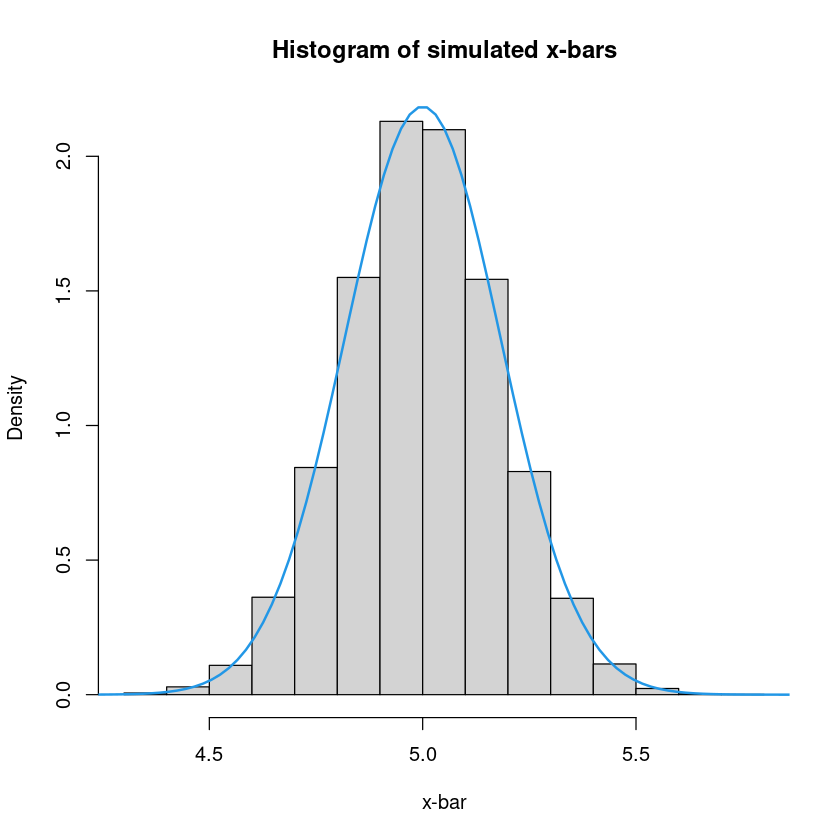

In [35]:
set.seed(1)
nsims=10000 # number of simulated datasets we need
result=c(0,nsims) # store 10000 instances
for(irep in 1:nsims){
    temp1=rnorm(30,5,1)
    result[irep]=mean(temp1) # mean
}
hist(result,freq=F,xlab='x-bar',main='Histogram of simulated x-bars')
lines(seq(4,6,length=100),dnorm(seq(4,6,length=100),5,sqrt(1/30)),lwd=2,col=4)

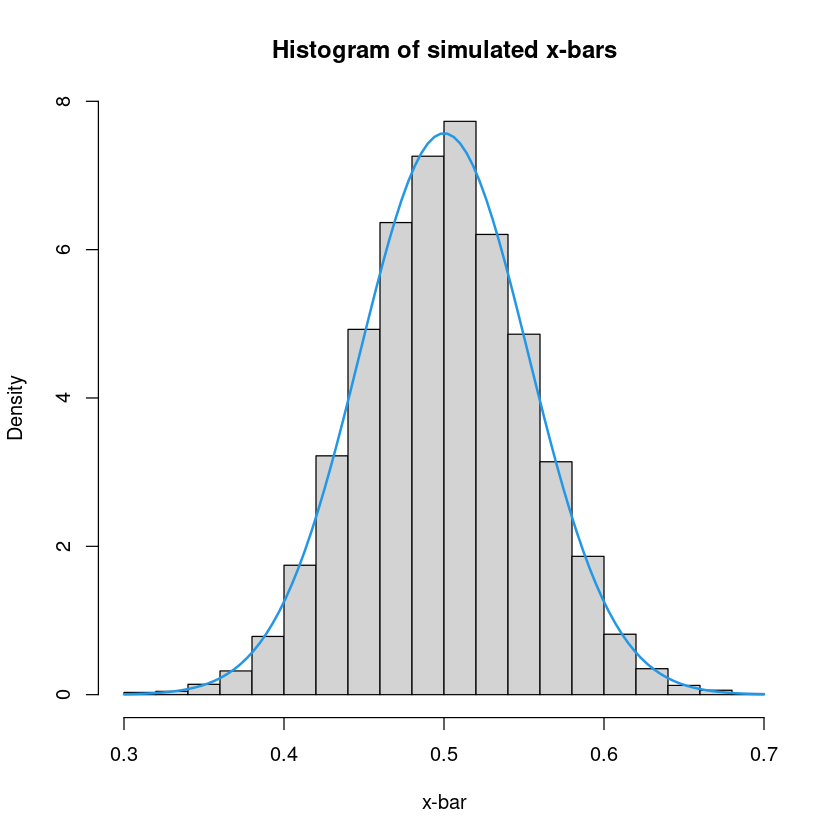

In [36]:
#Let’s try a different distribution.
set.seed(1)
nsims=10000 # number of simulated datasets we need
result=c(0,nsims) # store 10000 instances
for(irep in 1:nsims){
    temp1=runif(30,0,1)
    result[irep]=mean(temp1) # mean
}
hist(result,freq=F,xlab='x-bar',main='Histogram of simulated x-bars')
lines(seq(0.3,0.7,length=100),dnorm(seq(0.3,0.7,length=100),0.5,1/sqrt(12*30)),lwd=2,col=4)
# 12 는 V(x) = (베타 - 알파)^2 / 12 여기서 12이고
# 30은 n이다.

1. Case 1: CLT conditions hold.


(a) Simulate 10,000 samples of size n = 50 from Exp(λ = 5) and calculate X̄ each time. Plot
1
a histogram of the simulated X̄s and overlay the pdf of N (µ = 15 , σ 2 = 50∗5
2 ). How does
the shape of the histogram compare to the pdf? (Hint: Look at the code from Example 2,
but use the function rexp to generate the samples. You may also want to store your result
as a vector instead of a matrix by replacing matrix(0,nsims,3) with rep(0,nsims).)

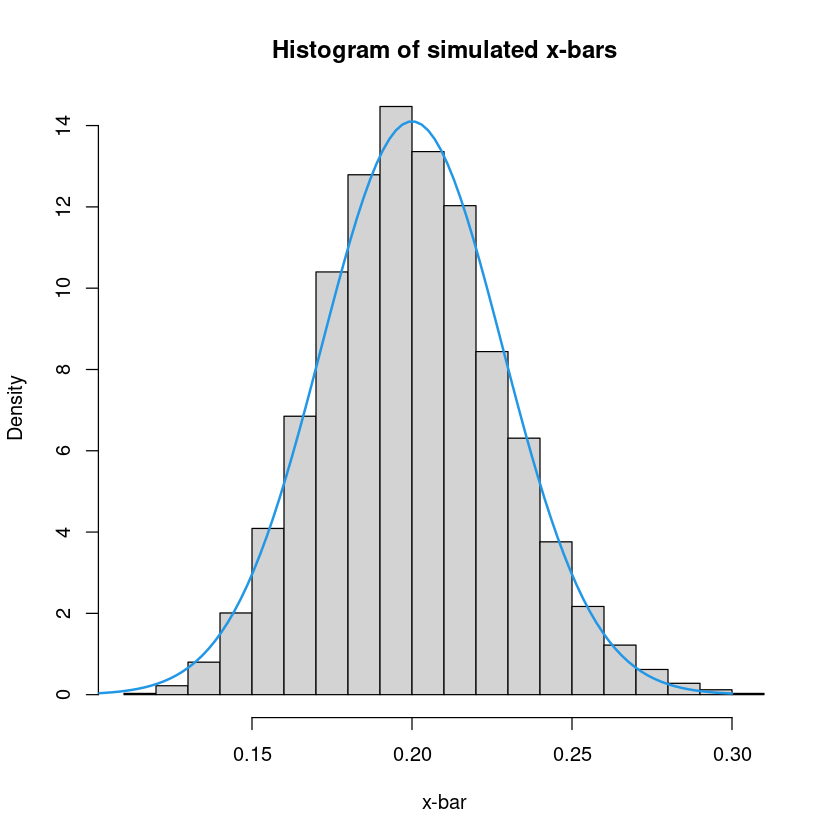

In [37]:
set.seed(1)
nsims=10000 # number of simulated datasets we need
result=rep(0,nsims) # store 10000 instances of x-bar
for(irep in 1:nsims){
    temp1=rexp(50,5)
    result[irep]=mean(temp1)
}
hist(result,freq=F,xlab='x-bar',main='Histogram of simulated x-bars',
    ylim=c(0,dnorm(1/5,1/5,sqrt(1/(50*25)))))
lines(seq(0.1,0.3,length=100),dnorm(seq(0.1,0.3,length=100),1/5,sqrt(1/(50*25))),
    lwd=2,col=4)
# the actual sampling distribution matches what the CLT predicts